# states on temperature from 2000 - 2012 (with linear regression line) 3 plots

In [2]:
#create dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as numpy
from scipy.stats import linregress

In [3]:
#import csv files and #turn csv into a dataframe
csv = "../Resources/GlobalLandTemperaturesByState.csv"
data = pd.read_csv(csv)
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [4]:
#remove null values
data1=data.dropna()
data1.count()

dt                               620027
AverageTemperature               620027
AverageTemperatureUncertainty    620027
State                            620027
Country                          620027
dtype: int64

In [5]:
data1.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [6]:
#Extracting year and month from the data(data1) 
data1['Year'] = data1['dt'].str[:4]
data1['Month'] = data1['dt'].str[5:7]
data1.head()

/Users/kaiwenli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kaiwenli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,Year,Month
0,1855-05-01,25.544,1.171,Acre,Brazil,1855,05
1,1855-06-01,24.228,1.103,Acre,Brazil,1855,06
2,1855-07-01,24.371,1.044,Acre,Brazil,1855,07
3,1855-08-01,25.427,1.073,Acre,Brazil,1855,08
4,1855-09-01,25.675,1.014,Acre,Brazil,1855,09


In [7]:
#calling the data of temperature
data1.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,Year,Month
0,1855-05-01,25.544,1.171,Acre,Brazil,1855,05
1,1855-06-01,24.228,1.103,Acre,Brazil,1855,06
2,1855-07-01,24.371,1.044,Acre,Brazil,1855,07
3,1855-08-01,25.427,1.073,Acre,Brazil,1855,08
4,1855-09-01,25.675,1.014,Acre,Brazil,1855,09


In [8]:
# taking out 2000 to 2012 data from data1 and save into year_data
year_data=data1[(data1['Year'] >= "2000") & (data1['Year'] <= "2012")]
year_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,Year,Month
1736,2000-01-01,25.934,0.379,Acre,Brazil,2000,01
1737,2000-02-01,26.102,0.288,Acre,Brazil,2000,02
1738,2000-03-01,26.107,0.269,Acre,Brazil,2000,03
1739,2000-04-01,25.952,0.427,Acre,Brazil,2000,04
1740,2000-05-01,25.832,0.345,Acre,Brazil,2000,05


# Plot scatter and regression line for Temperature (California 2000-2012)

In [9]:
#extracting only the california data 
california_year_data=year_data[(year_data['State'] == "California")]
california_year_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,Year,Month
72870,2000-01-01,7.667,0.226,California,United States,2000,01
72871,2000-02-01,8.692,0.209,California,United States,2000,02
72872,2000-03-01,10.534,0.134,California,United States,2000,03
72873,2000-04-01,14.629,0.191,California,United States,2000,04
72874,2000-05-01,17.993,0.164,California,United States,2000,05


In [10]:
california_year_data=california_year_data[['AverageTemperature', 'Year', 'State']]

In [11]:
california_year_data.tail()

,AverageTemperature,Year,State
73021,25.407,2012,California
73022,22.760,2012,California
73023,16.638,2012,California
73024,11.475,2012,California
73025,6.062,2012,California


In [12]:
 #Taking out mean  of Average temperature  for  each  same year 
California_State_group = california_year_data.groupby(["State","Year"], as_index=False)
California_State_temp_mean = California_State_group.mean()
California_State_temp_mean

,State,Year,AverageTemperature
0,California,2000,15.019333
1,California,2001,15.171250
2,California,2002,15.037583
3,California,2003,15.391417
4,California,2004,15.068750
5,California,2005,14.919667
6,California,2006,14.945417
7,California,2007,15.062417
8,California,2008,15.071167
9,California,2009,15.004250


In [13]:
#extracting the columnb for graph
California_State_temp_mean=California_State_temp_mean[['AverageTemperature', 'Year',]]
California_State_temp_mean

,AverageTemperature,Year
0,15.019333,2000
1,15.171250,2001
2,15.037583,2002
3,15.391417,2003
4,15.068750,2004
5,14.919667,2005
6,14.945417,2006
7,15.062417,2007
8,15.071167,2008
9,15.004250,2009


In [14]:
#transpose the California data 
#modified the index
#and rename the column
#changing the column type as float

x5_values = California_State_temp_mean["Year"]
y5_values = California_State_temp_mean["AverageTemperature"]
x5_values=x5_values.astype('float')
y5_values=y5_values.astype('float')

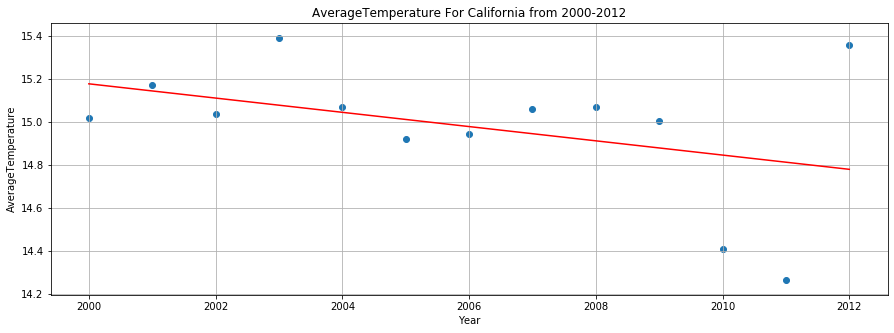

In [15]:
fig= plt.figure(figsize=(15,5))
plt.xlabel("Year")
plt.ylabel("AverageTemperature")
plt.title("AverageTemperature For California from 2000-2012")
plt.grid(True)
plt.scatter(x5_values,y5_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x5_values, y5_values)
regress_values = x5_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


linregress(x5_values,regress_values)
plt.plot(x5_values, intercept + slope*x5_values, 'r', label='fitted line')
plt.grid(True)



# Plot scatter and regression line for Temperature (Illinois 2000-2012)

In [16]:
#extracting only the Illinois data 
Illinois_year_data=year_data[(year_data['State'] == "Illinois")]
Illinois_year_data=Illinois_year_data[['AverageTemperature', 'Year', 'State']]
#Taking out mean  of Average temperature  for  each  same year 
Illinois_State_group = Illinois_year_data.groupby(["State","Year"], as_index=False)
Illinois_State_temp_mean = Illinois_State_group.mean()
#extracting the columnb for graph
Illinois_State_temp_mean=Illinois_State_temp_mean[['AverageTemperature', 'Year',]]
Illinois_State_temp_mean.tail()

,AverageTemperature,Year
8,10.841917,2008
9,11.130000,2009
10,12.002250,2010
11,12.111833,2011
12,13.523750,2012


In [17]:
#transpose the Illinois data 
#modified the index
#and rename the column
#changing the column type as float

x6_values = Illinois_State_temp_mean["Year"]
y6_values = Illinois_State_temp_mean["AverageTemperature"]
x6_values=x6_values.astype('float')
y6_values=y6_values.astype('float')


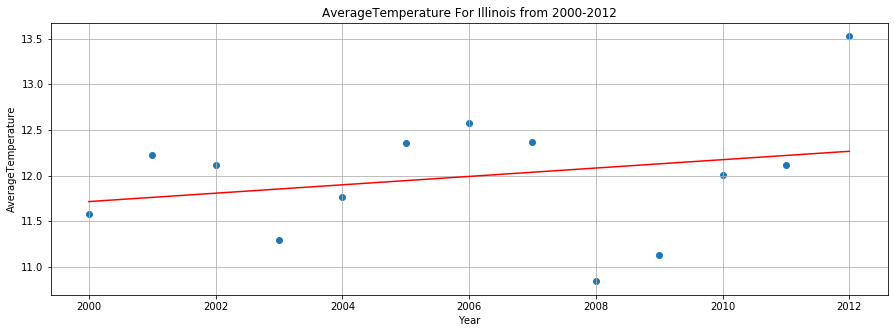

In [18]:
fig= plt.figure(figsize=(15,5))
plt.xlabel("Year")
plt.ylabel("AverageTemperature")
plt.title("AverageTemperature For Illinois from 2000-2012")
plt.grid(True)
plt.scatter(x6_values,y6_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x6_values, y6_values)
regress_values = x6_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


linregress(x6_values,regress_values)
plt.plot(x6_values, intercept + slope*x6_values, 'r', label='fitted line')
plt.grid(True)


# Plot scatter and regression line for Temperature (New York 2000-2012)

In [19]:
#extracting only the New_York data 
New_York_year_data=year_data[(year_data['State'] == "New York")]
New_York_year_data=New_York_year_data[['AverageTemperature', 'Year', 'State']]
#Taking out mean  of Average temperature  for  each  same year 
New_York_State_group = New_York_year_data.groupby(["State","Year"], as_index=False)
New_York_State_temp_mean = New_York_State_group.mean()
#extracting the columnb for graph
New_York_State_temp_mean=New_York_State_temp_mean[['AverageTemperature', 'Year',]]
New_York_State_temp_mean.tail()

,AverageTemperature,Year
8,8.292750,2008
9,7.883750,2009
10,9.141583,2010
11,9.007583,2011
12,9.914750,2012


In [20]:
#transpose the Illinois data 
#modified the index
#and rename the column
#changing the column type as float

x7_values = New_York_State_temp_mean["Year"]
y7_values = New_York_State_temp_mean["AverageTemperature"]
x7_values=x7_values.astype('float')
y7_values=y6_values.astype('float')


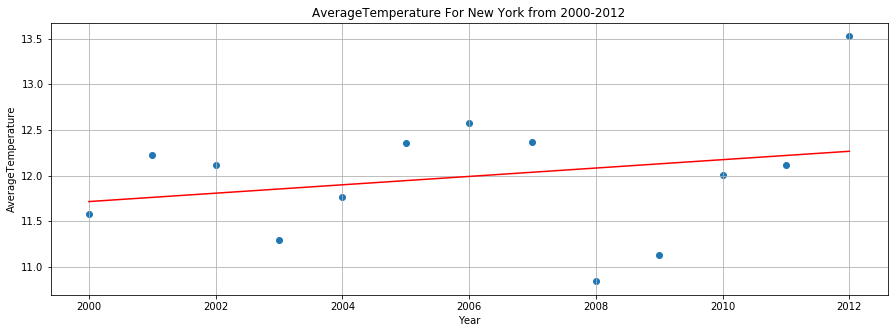

In [21]:
fig= plt.figure(figsize=(15,5))
plt.xlabel("Year")
plt.ylabel("AverageTemperature")
plt.title("AverageTemperature For New York from 2000-2012")
plt.grid(True)
plt.scatter(x7_values,y7_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x7_values, y7_values)
regress_values = x7_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


linregress(x7_values,regress_values)
plt.plot(x7_values, intercept + slope*x7_values, 'r', label='fitted line')
plt.grid(True)